# Molecule representation 

In [2]:
import sys
from rdkit import Chem
from rdkit.Chem import Descriptors, rdFingerprintGenerator, MACCSkeys, Draw, AllChem
from torch_geometric.utils import to_networkx
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
sys.path.append("../")
from tcad.tools.gtools import mol_to_torch_data

## String

In [3]:
# Paracetamol

# Canonical SMILEs
smiles = "CC(=O)NC1=CC=C(C=C1)O"

# Molecular formula
formula = "C8H9NO2" 

# InChI
inchi = "nChI=1S/C8H9NO2/c1-6(10)9-7-2-4-8(11)5-3-7/h2-5,11H,1H3,(H,9,10)/i2D,3D,4D,5D"


## Vector representation

### As a set of molecular descriptors

In [4]:
# List of available rdkit descriptors 
avail_descriptors = [descriptor_name for descriptor_name, _ in  Descriptors.descList]

# Generating molecule object from SMILEs
molecule = Chem.MolFromSmiles(smiles)

# Representing molecule as a vector of descriptor values
mol_vec = [descriptor_func(molecule) for _, descriptor_func in Descriptors.descList]

print(f"available descriptor count: {len(avail_descriptors)}")
print("descriptors and it values from 11-th to 14-th ")
print("#"*45+"\n")
print(f"...{avail_descriptors[10:14]}...")
print(f"...{mol_vec[10:14]}...")

available descriptor count: 208
descriptors and it values from 11-th to 14-th 
#############################################

...['MaxPartialCharge', 'MinPartialCharge', 'MaxAbsPartialCharge', 'MinAbsPartialCharge']...
...[0.22074743631242583, -0.5079643157925783, 0.5079643157925783, 0.22074743631242583]...


### Fingerprint vector representation

In [5]:

# Fingerprint generator instance
RDKIT_FINGERPRINT_GENERATOR = rdFingerprintGenerator.GetRDKitFPGenerator(maxPath=5)

# RDKIT Fingerptint as np.ndarray
rdkit_fingerprint = np.array(RDKIT_FINGERPRINT_GENERATOR.GetFingerprint(molecule))

# MACCS keys Fingerptint as np.ndarray
maccs_fingerprint= np.array(MACCSkeys.GenMACCSKeys(molecule))

print("#"*21+" RDKIT (70-95) "+"#"*21)
print(f"...{rdkit_fingerprint[70:95]}...")

print("#"*20+" MACCS (70-95) "+"#"*20)
print(f"...{maccs_fingerprint[70:95]}...")


##################### RDKIT (70-95) #####################
...[0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]...
#################### MACCS (70-95) ####################
...[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]...


## 2D and 3D Molecule repesentation as an image

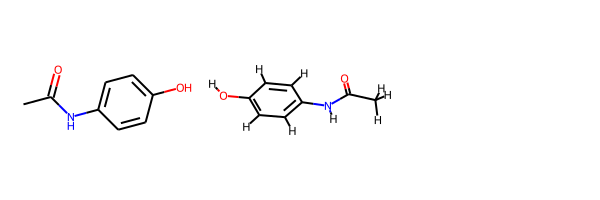

In [6]:
molecule_hs = AllChem.AddHs(molecule)
AllChem.EmbedMolecule(molecule_hs)

Draw.MolsToGridImage([molecule, molecule_hs], 2)

## Graph molecule representation

### As an adjacency matrix

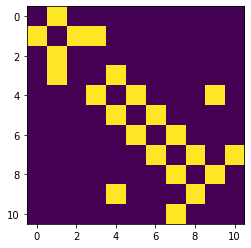

In [13]:
plt.imshow(Chem.GetAdjacencyMatrix(molecule))
plt.show()

### As a torch_geometric.Data object

In [8]:
torch_molecule = mol_to_torch_data(molecule)
torch_molecule

Data(x=[11, 6], edge_index=[2, 22], edge_attr=[22])

### As networkx.Graph object

Graph with 11 nodes and 11 edges


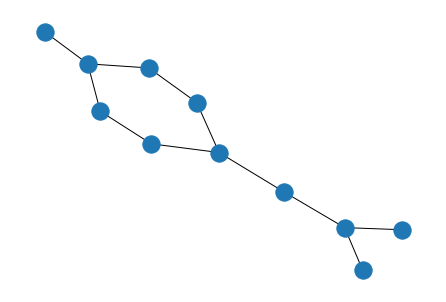

In [9]:
nx_molecule = to_networkx(torch_molecule, to_undirected=True)
print(nx_molecule)
nx.draw(nx_molecule)

### Connectivity table representation

In [10]:
print(Chem.MolToMolBlock(molecule))


     RDKit          2D

 11 11  0  0  0  0  0  0  0  0999 V2000
    5.2500   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.7500   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.0000   -2.5981    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    3.0000    0.0000    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
    1.5000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.7500   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.7500   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.5000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.7500    1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.7500    1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -3.0000    0.0000    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  1  0
  2  3  2  0
  2  4  1  0
  4  5  1  0
  5  6  2  0
  6  7  1  0
  7  8  2  0
  8  9  1  0
  9 10  2  0
  8 11  1  0
 10  5  1  0
M  END

